# The Good, the Bad, and the Ugly: Visualization

In [1]:
# Load ggplot library
library(ggplot2)

In [2]:
# Load our data, which lives in intl.csv

intl = read.csv("data/intl.csv")

head(intl)

,Region,PercentOfIntl
,<fct>,<dbl>
1,Asia,0.531
2,Europe,0.201
3,North America,0.098
4,Latin Am. & Caribbean,0.090
5,Middle East,0.054
6,Africa,0.020


In [3]:
str(intl)

'data.frame':	8 obs. of  2 variables:
 $ Region       : Factor w/ 8 levels "Africa","Asia",..: 2 3 6 4 5 1 7 8
 $ PercentOfIntl: num  0.531 0.201 0.098 0.09 0.054 0.02 0.015 0.002


## Bar Plot

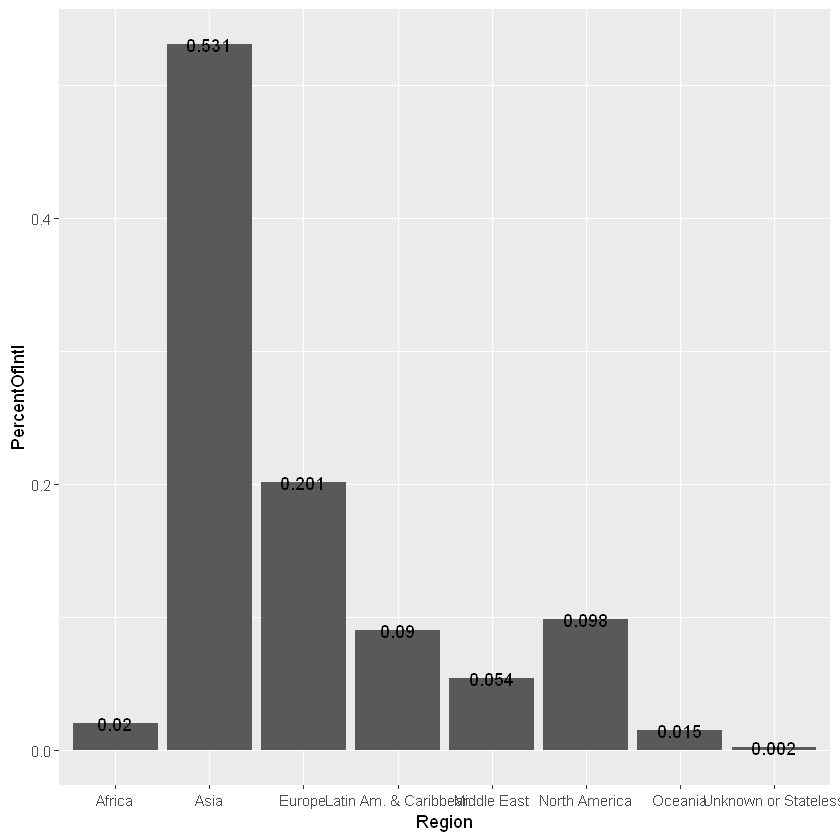

In [4]:
# We want to make a bar plot with region on the X axis and Percentage on the y-axis.

ggplot(intl, aes(x=Region, y=PercentOfIntl)) + geom_bar(stat="identity") + geom_text(aes(label=PercentOfIntl))

So we're going to transform the international (**intl**) data frame. And what we're going to do is say, **Region**, it's going to be a reordering of itself, based on decreasing order of **PercentOfIntl**:

In [5]:
# Make Region an ordered factor. We can do this with the re-order command and transform command. 

intl = transform(intl, Region = reorder(Region, -PercentOfIntl))

# The negative sign in "-PercentOfIntl" means decreasing order.

In [6]:
# Look at the structure
str(intl)

'data.frame':	8 obs. of  2 variables:
 $ Region       : Factor w/ 8 levels "Asia","Europe",..: 1 2 3 4 5 6 7 8
  ..- attr(*, "scores")= num [1:8(1d)] -0.02 -0.531 -0.201 -0.09 -0.054 -0.098 -0.015 -0.002
  .. ..- attr(*, "dimnames")=List of 1
  .. .. ..$ : chr  "Africa" "Asia" "Europe" "Latin Am. & Caribbean" ...
 $ PercentOfIntl: num  0.531 0.201 0.098 0.09 0.054 0.02 0.015 0.002


In [7]:
# Make the percentages out of 100 instead of fractions

intl$PercentOfIntl = intl$PercentOfIntl * 100

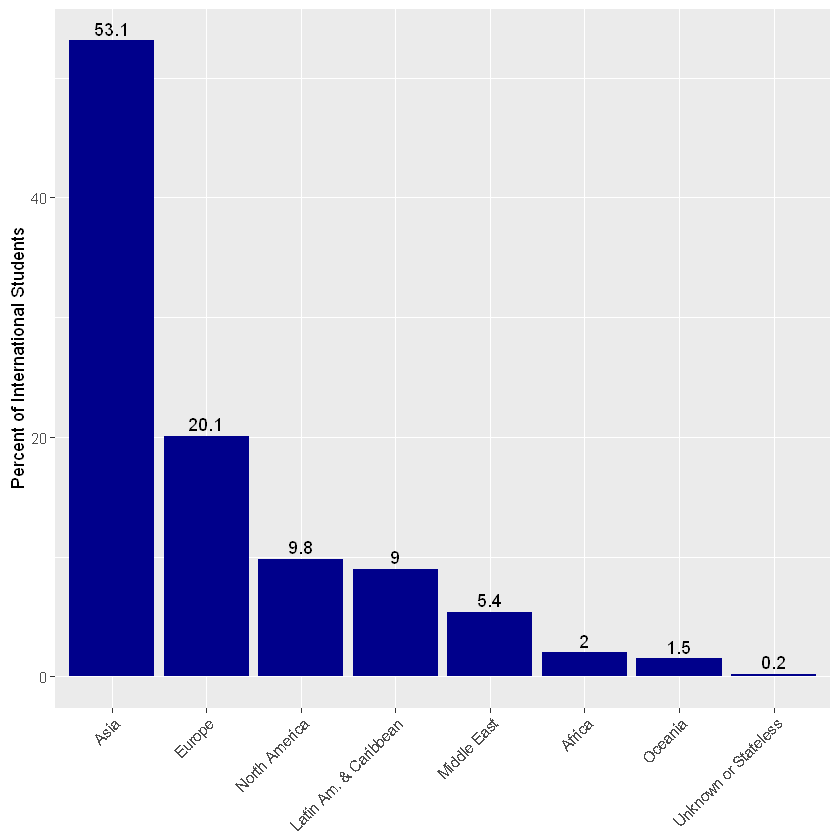

In [8]:
# Make the plot
ggplot(intl, aes(x=Region, y=PercentOfIntl)) + 
                    geom_bar(stat="identity", fill="dark blue") + 
                    geom_text(aes(label=PercentOfIntl), vjust=-0.4) + # a negative value will move it up.
                    ylab("Percent of International Students") +
                    theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1))

In [9]:
# First, lets make sure we have ggplot2 loaded
library(ggplot2)

In [10]:
# Now lets load our dataframe

households = read.csv("data/households.csv")

households

Year,MarriedWChild,MarriedWOChild,OtherFamily,MenAlone,WomenAlone,OtherNonfamily
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1970,40.3,30.3,10.6,5.6,11.5,1.7
1980,30.9,29.9,12.9,8.6,14.0,3.6
1990,26.3,29.8,14.8,9.7,14.9,4.6
1995,25.5,28.9,15.6,10.2,14.7,5.0
2000,24.1,28.7,16.0,10.7,14.8,5.7
2005,22.9,28.3,16.7,11.3,15.3,5.6
2010,20.9,28.8,17.4,11.9,14.8,6.2
2012,19.6,29.1,17.8,12.3,15.2,6.1


In [11]:
str(households)

'data.frame':	8 obs. of  7 variables:
 $ Year          : int  1970 1980 1990 1995 2000 2005 2010 2012
 $ MarriedWChild : num  40.3 30.9 26.3 25.5 24.1 22.9 20.9 19.6
 $ MarriedWOChild: num  30.3 29.9 29.8 28.9 28.7 28.3 28.8 29.1
 $ OtherFamily   : num  10.6 12.9 14.8 15.6 16 16.7 17.4 17.8
 $ MenAlone      : num  5.6 8.6 9.7 10.2 10.7 11.3 11.9 12.3
 $ WomenAlone    : num  11.5 14 14.9 14.7 14.8 15.3 14.8 15.2
 $ OtherNonfamily: num  1.7 3.6 4.6 5 5.7 5.6 6.2 6.1


In [12]:
# Load reshape2
library(reshape2)

In [13]:
# Lets look at all rows and the first two columns 
households[,1:2]

Year,MarriedWChild
<int>,<dbl>
1970,40.3
1980,30.9
1990,26.3
1995,25.5
2000,24.1
2005,22.9
2010,20.9
2012,19.6


In [14]:
# First few rows of our melted households dataframe
head(melt(households, id="Year"),10)

,Year,variable,value
,<int>,<fct>,<dbl>
1,1970,MarriedWChild,40.3
2,1980,MarriedWChild,30.9
3,1990,MarriedWChild,26.3
4,1995,MarriedWChild,25.5
5,2000,MarriedWChild,24.1
6,2005,MarriedWChild,22.9
7,2010,MarriedWChild,20.9
8,2012,MarriedWChild,19.6
9,1970,MarriedWOChild,30.3


In [15]:
households[,1:3]

Year,MarriedWChild,MarriedWOChild
<int>,<dbl>,<dbl>
1970,40.3,30.3
1980,30.9,29.9
1990,26.3,29.8
1995,25.5,28.9
2000,24.1,28.7
2005,22.9,28.3
2010,20.9,28.8
2012,19.6,29.1


In [16]:
melt(households, id="Year")[1:10,3]

[1] 40.3 30.9 26.3 25.5 24.1 22.9 20.9 19.6 30.3 29.9

In [17]:
melt(households, id="Year")[1:10,]

,Year,variable,value
,<int>,<fct>,<dbl>
1,1970,MarriedWChild,40.3
2,1980,MarriedWChild,30.9
3,1990,MarriedWChild,26.3
4,1995,MarriedWChild,25.5
5,2000,MarriedWChild,24.1
6,2005,MarriedWChild,22.9
7,2010,MarriedWChild,20.9
8,2012,MarriedWChild,19.6
9,1970,MarriedWOChild,30.3


## Line Charts

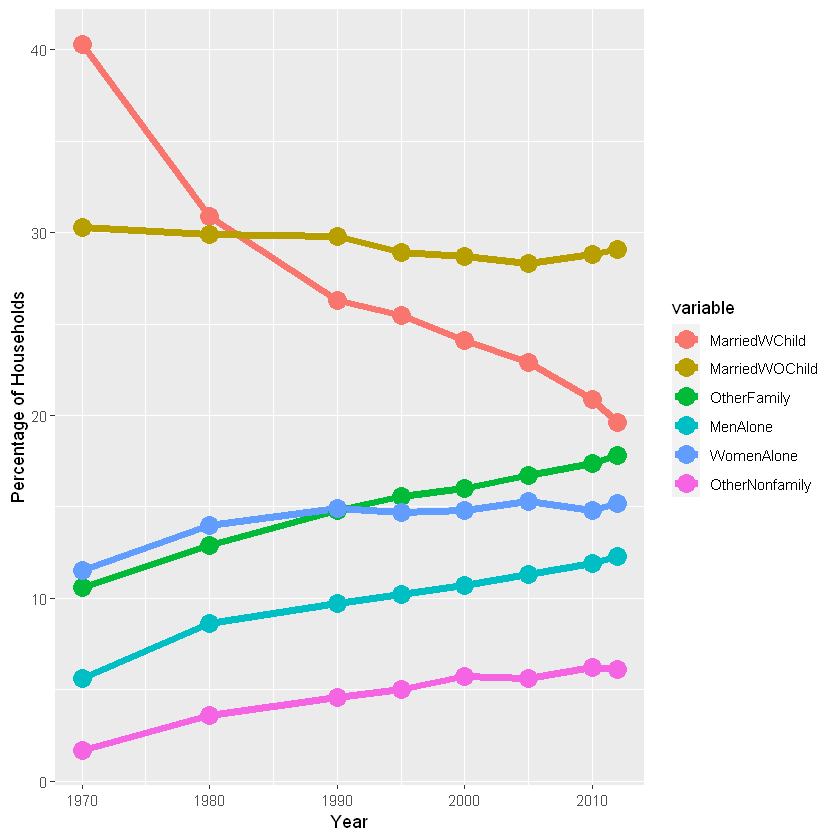

In [18]:
# Plot it
ggplot(melt(households, id="Year"), aes(x=Year, y=value, color=variable)) + geom_line(size=2) + 
                                                                            geom_point(size=5) +  
                                                                            ylab("Percentage of Households")